In [ ]:
'''
Task: Astronomical tides are an excellent example of a complex periodic signal. 
However, water-levels are also influenced by a myriad other processes. 
The dominant tidal constituents for most subtropical regions are the 
principal lunar tidal period is roughly Tl ≈ 12 h 25 min 
and principal solar tide with a period Ts ≈ 12 h. 

We will determine what fraction of water-level variability is described by these two constituents using 
a 1-month tide gauge record (choose your birthday month). 

First, navigate to https://tidesandcurrents.noaa.gov/ and choose a station somewhere you’d someday like to visit.

'''

In [ ]:
'''

1. Download an ASCII water-level file (e.g., .csv) of the 6-minute verified observations. 
You can either do this manually, or develop code to download data directly from the NOAA API. 
Here is example code to download water-level data from a NOAA tide gauge, just modify the variables gaugeID, 
startDate, endDate to match your desired queary (note: the % symbol tells matlab that text on the remainder of the 
line is a comment not code):

############################ MATLAB CODE ############################

% In order to retreive water−level data using NOAA’s API we need the tide gauge’s identifier

gaugeID = ’ 8658163 ’ ;

% start /end date for the data−set

startDate = ’20230101’; endDate = ’ 20230201 ’ ;

% % % % % %
3) The desired variable / interval / units / formatting ,
see string after ”product” below. See also: https://api.tidesandcurrents.noaa.gov/api/prod/
the URL syntax to queiry data using their API ( application programming interface )−−a method for two computers to communicate , here it ’s your computer talking to the file −system housing the data .

url = [’https://api.tidesandcurrents.noaa.gov/api/prod/datagetter?begin date =’ , startDate , ’&end date=’ ,endDate , ’&station=’ ,gaugeID , ’&product=
water level&interval=6&datum=NAVD&time zone=gmt&units=metric&format=csv ’
];


% 5) create a filename to save the data on hard−drive :

fileName = [’/path/to/data/data/water levels ’,gaugeID,’ ’,startDate ,’ ’, endDate , ’ . csv ’ ] ;
websave(fileName,url);
%

'''

In [76]:
# import needed packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylib import *
from datetime import datetime
import matplotlib.dates as mdates


# Bar Harbor, ME - Station ID: 8413320
# metric, GMT, MSL, 

# downloaded manually, will develop code for downloading if time allows

file_loc = '/Users/kboothomefolder/phy577_projects/hw2/data/CO-OPS_8413320_met.csv'
sta = pd.read_csv(file_loc)

sta.drop(columns=sta.columns[-2], inplace=True)
sta.iloc[0:50]

sta['datestr']=sta.iloc[:,0:2].astype(str).apply('-'.join,axis=1)

################# Create array variables ##########################3

# use pandas to convert datestr column to a recognizable format  
time = np.asarray(pd.to_datetime(sta.datestr,format='%Y/%m/%d-%H:%M'))

MSL = np.asarray(pd.to_numeric(sta.iloc[:,3]))

#print(sta.iloc[:,3])
#print(sta)

In [70]:
# Check variable types
#print(type(sta.iloc[3, 3])) # type float


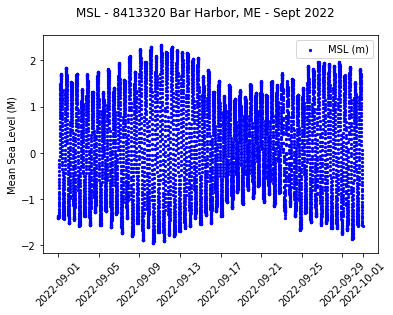

In [75]:

fig, ax = plt.subplots()

# Plot MSL 
ax.scatter(time, MSL, color='blue', label='MSL (m)', s=5)
ax.set_ylabel('Mean Sea Level (M)')
ax.tick_params(axis='x', rotation=45)

###### how to only display day/mo? ##########
#import matplotlib.dates as mdates
#date = time.DateFormatter('%m-%d')
#ax.xaxis.set_major_formatter(date)

ax.legend()

plt.suptitle('MSL - 8413320 Bar Harbor, ME - Sept 2022')

# Save the figures
output_dir = '/Users/kboothomefolder/phy577_projects/hw2/figures'
savefig(os.path.join(output_dir, 'MSL_BHME.png'))
